Minimum_nights
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [2]:
import pandas as pd

# Cargar únicamente la columna 'Review_scores_accuracy' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['minimum_nights'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'Review_scores_accuracy' existe en el DataFrame
if 'minimum_nights' in data.columns:
    # Tipo de dato
    tipo_dato = data['minimum_nights'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['minimum_nights'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['minimum_nights'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['minimum_nights'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['minimum_nights'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'minimum_nights':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'minimum_nights' no existe en el DataFrame.")

print(data['minimum_nights'].value_counts())
print(data['minimum_nights'].unique())

Columna 'minimum_nights':
 - Tipo de dato: int64
 - Cantidad de nulos: 0
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 202
 - Cantidad de datos totales: 279712
minimum_nights
1       92839
2       60877
3       37869
30      28881
5       13770
        ...  
156         1
1100        1
178         1
9999        1
340         1
Name: count, Length: 202, dtype: int64
[   2    1    7    3    4    5    6    8   19   14   10   28    9   30
   20 1001   15   29  110  222   95   50  180   13   25   31   12   60
  300   90  270  120   24  200   21  156   27  100  365  150   55   91
   17  400 1124   70  360  250   11   65   26  600  335   23  500   18
   35 1125   88   59   93 1000  280   58   22   68  480  366  364   78
   40   52   45   99  395  630   32  355   80  999  444   16   92   42
   82  213  186  185   47   75   85  240  210   36   33  275 1100  183
  126  158  184   89  333   94  730  181   61   56  258   44   84  720
  356   49 1112  211   72  370  550  182  399  109   37 

Analisis Cuantitaivo CON OUTLIERS:
* Promedio
* Min
* Max
* Desviacion Estandar
* Q1
* Q2
* Q3
* Q4
* Mediana
* Kurtosis
* Skewness

In [3]:
# Cantidad de filas antes de aplicar dropna
total_antes = data['minimum_nights'].shape[0]

# Filtrar valores válidos
valores_validos = data['minimum_nights'].dropna()

# Cantidad de filas después de aplicar dropna
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se dropearon
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas sin transformar a escala relativa
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    varianza = valores_validos.var()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    mediana = valores_validos.median()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'minimum_nights':")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Mediana: {mediana}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")

Cantidad de valores eliminados (dropeados): 0

Análisis Cuantitativo de 'minimum_nights':
 - Promedio: 8.05
 - Mínimo: 1
 - Máximo: 9999
 - Desviación estándar: 31.52
 - Varianza: 993.44
 - Q1 (25%): 1.0
 - Q2 / Mediana (50%): 2.0
 - Q3 (75%): 5.0
 - Q4 (100%): 9999.0
 - Mediana: 2.0
 - Curtosis (Kurtosis): 36317.5373
 - Asimetría (Skewness): 123.1709


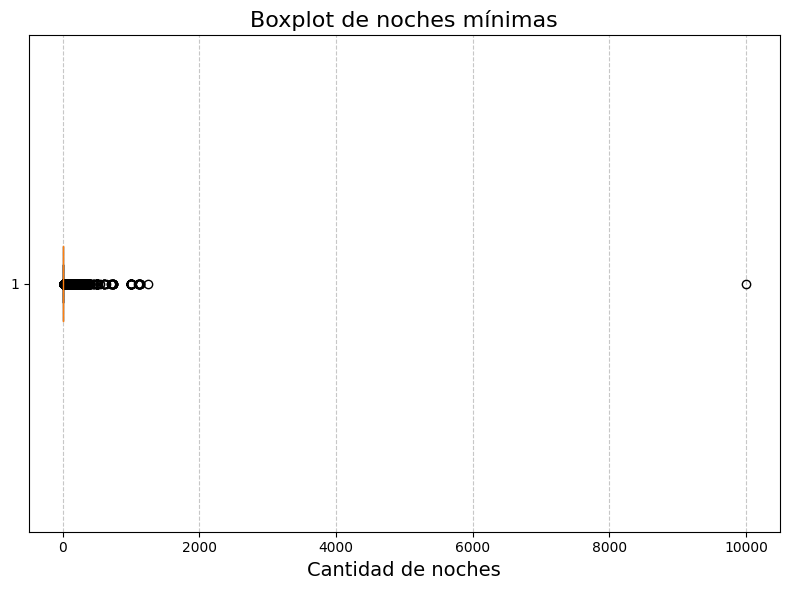

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


if 'minimum_nights' in data.columns:
    # Filtrar valores válidos (eliminar nulos)
    valores_validos = data['minimum_nights'].dropna()

    # Crear el gráfico boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(valores_validos, vert=False, patch_artist=True, boxprops=dict(facecolor='green'))
    plt.title('Boxplot de noches mínimas', fontsize=16)
    plt.xlabel('Cantidad de noches', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'review_scores_value' no existe en el DataFrame.")

ANALISIS CUANTITATIVO APLICANDO FUNCIÓN DE OUTLIERS  

In [6]:
# 1. Filtrar valores válidos: eliminar nulos y valores 0
valores_validos = data['minimum_nights'].dropna()

# 2. Cálculo de IQR y límites
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 3. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 4. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 5. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 6. Mostrar resultados
    print(f"Cantidad de outliers detectados: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'minimum_nights' (escala natural, sin outliers):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados: 43105

Análisis Cuantitativo de 'minimum_nights' (escala natural, sin outliers):
 - Promedio: 2.47
 - Mínimo: 1
 - Máximo: 11
 - Desviación estándar: 1.85
 - Q1 (25%): 1.0
 - Q2 / Mediana (50%): 2.0
 - Q3 (75%): 3.0
 - Varianza: 3.4072
 - Curtosis (Kurtosis): 3.0310
 - Asimetría (Skewness): 1.7232


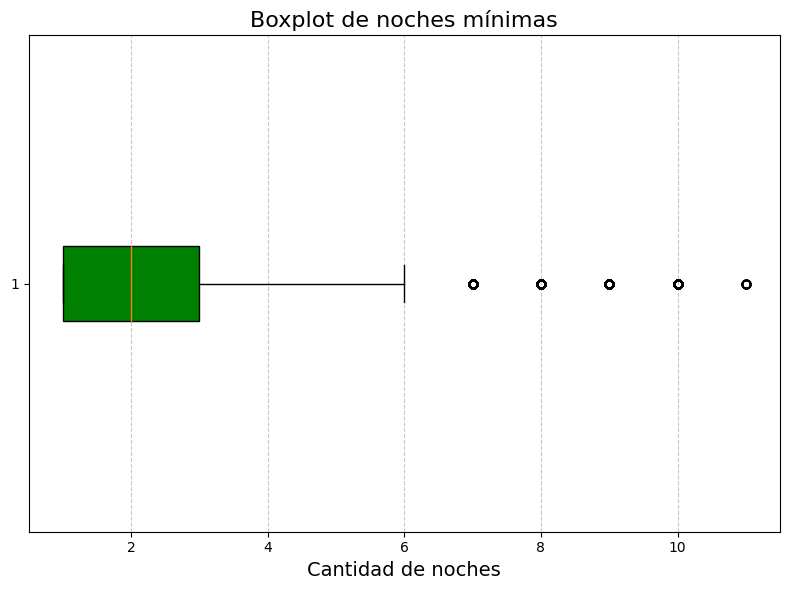

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar si la columna 'accommodates' existe en el DataFrame
if 'minimum_nights' in data.columns:
    # Filtrar valores válidos (eliminar nulos)
    valores_validos = data['minimum_nights'].dropna()

    # Calcular IQR y límites para eliminar outliers
    q1 = valores_validos.quantile(0.25)
    q3 = valores_validos.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Eliminar outliers
    valores_filtrados = valores_validos[
        (valores_validos >= limite_inferior) & (valores_validos <= limite_superior)
    ]

    # Crear el gráfico boxplot (sin outliers)
    plt.figure(figsize=(8, 6))
    plt.boxplot(valores_filtrados, vert=False, patch_artist=True,
                boxprops=dict(facecolor='green'))
    plt.title('Boxplot de noches mínimas', fontsize=16)
    plt.xlabel('Cantidad de noches', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'accommodates' no existe en el DataFrame.")
